In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [5]:
data = pd.read_csv('bestsellers with categories.csv',sep=',',encoding='latin')
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
data.Genre.value_counts()


Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

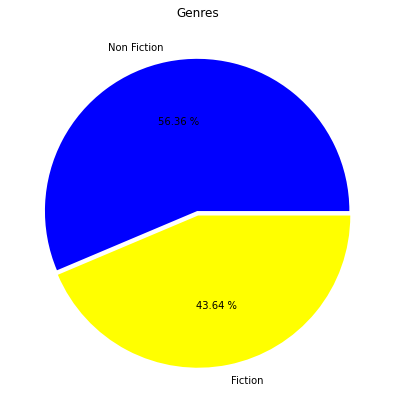

In [7]:
labels = list(data.Genre.value_counts().to_dict().keys())
non_fiction = list(data.Genre.value_counts().to_dict().values())[0]
fiction = list(data.Genre.value_counts().to_dict().values())[1]

plt.figure(figsize=(7,7))
plt.title("Genres")
explode = [0.01, 0.02]
colors = ['blue', 'yellow']

plt.pie([non_fiction, fiction], 
        labels = labels, 
        autopct = '%.2f %%',
        explode = explode, 
        colors = colors);

In [8]:
data.Year.value_counts()


2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

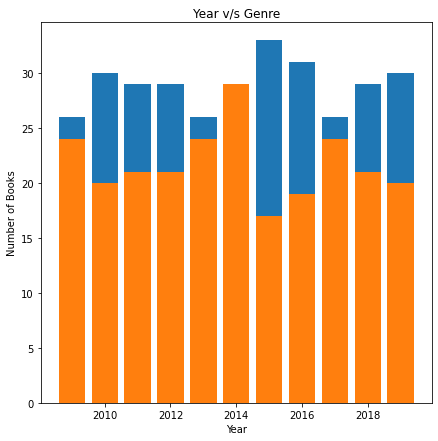

In [9]:
plt.figure(figsize=(7,7))
plt.title('Year v/s Genre')


plt.bar(data[data['Genre']== 'Non Fiction'].Year.value_counts().to_dict().keys(),
        data[data['Genre']== 'Non Fiction'].Year.value_counts().to_dict().values());


plt.bar(data[data['Genre']== 'Fiction'].Year.value_counts().to_dict().keys(),
        data[data['Genre']== 'Fiction'].Year.value_counts().to_dict().values());

plt.xlabel('Year')
plt.ylabel("Number of Books");

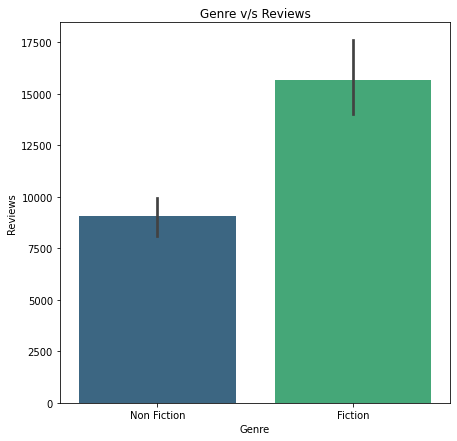

In [10]:
plt.figure(figsize=(7,7))
plt.title("Genre v/s Reviews")
sns.barplot(x = 'Genre',
            y = 'Reviews',
            palette = "viridis",
            data = data);


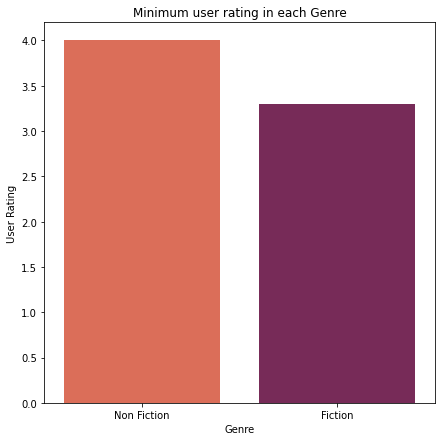

In [11]:
nf = data[data['Genre']== 'Non Fiction']['User Rating'].min()
f = data[data['Genre']== 'Fiction']['User Rating'].min()

plt.figure(figsize=(7,7))
plt.title("Minimum user rating in each Genre")
plt.xlabel('Genre')
plt.ylabel('User Rating')
sns.barplot(x= list(data.Genre.value_counts().to_dict().keys()), 
            y = [nf,f],
            palette = 'rocket_r');

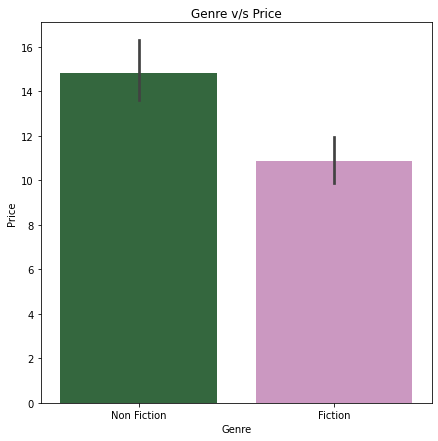

In [12]:
plt.figure(figsize=(7,7))

plt.title('Genre v/s Price')
sns.barplot(x = 'Genre',
            y = 'Price',
            palette= "cubehelix",
            data = data);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

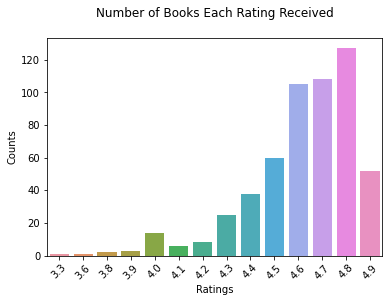

In [13]:
# number of books per rating
sns.barplot(data['User Rating'].value_counts().head(15).index, data['User Rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'No. of Publications')

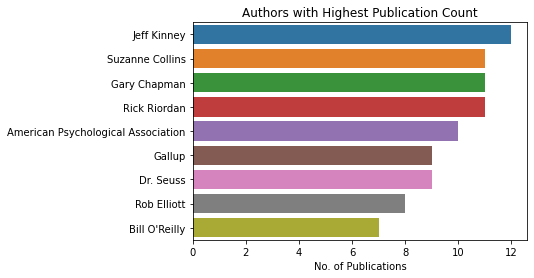

In [15]:
# authors with highest publications
top_authors = data['Author'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')